In [1]:
import os
import pickle

import altair as alt

import pandas as pd

import yaml

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE
from matplotlib import pyplot as plt

import matplotlib.transforms
import warnings 
warnings.filterwarnings("ignore")

import Bio.SeqIO

import dms_variants.codonvarianttable
import dms_variants.utils

In [11]:
import re

In [2]:
# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

In [3]:
# change working directory to top of repo
os.chdir('../../')

In [4]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [9]:
libA_prob_escape = pd.read_csv('results/prob_escape/libA_220711_1_AUSAB-13_1_prob_escape.csv')

In [13]:
libA_prob_escape = libA_prob_escape.fillna('')

In [14]:
def get_sites(aa_substitutions):
    # pull out every number and return as a list
    sites = list(map(int, re.findall(r'\d+', aa_substitutions)))
    
    return sites

libA_prob_escape['mut_sites'] = libA_prob_escape.apply(lambda x: get_sites(x['aa_substitutions_sequential']), axis=1)
libA_prob_escape.head()

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration,mut_sites
0,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.8423,0.8423,310880,356009,93081,89787,14787849,15,K278I,AUSAB-13,0.0002,[297]
1,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,Y113N T150K L263H V342Y,4,AGACACTAAATACAGC,0.8505,0.8505,92442,104849,93081,89787,14787849,15,Y94N T131K L244H V323Y,AUSAB-13,0.0002,"[113, 150, 263, 342]"
2,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,K46A I301V E409M,3,AAAAATCTGAGACAAA,0.8371,0.8371,90415,104183,93081,89787,14787849,15,K27A I282V E390M,AUSAB-13,0.0002,"[46, 301, 409]"
3,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,,0,AGCCTATTAGGATTCG,0.8302,0.8302,84553,98240,93081,89787,14787849,15,,AUSAB-13,0.0002,[]
4,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.8845,0.8845,84254,91880,93081,89787,14787849,15,R92S V347M R383S,AUSAB-13,0.0002,"[111, 366, 402]"


In [78]:
libA_prob_escape['aa_subs_list'] = libA_prob_escape.apply(lambda x: 
                                                          x['aa_substitutions_sequential'].split(' '), axis=1)
libA_prob_escape

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration,mut_sites,159_160,aa_subs_list
0,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.8423,0.8423,310880,356009,93081,89787,14787849,15,K278I,AUSAB-13,0.0002,[297],,[K297I]
1,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,Y113N T150K L263H V342Y,4,AGACACTAAATACAGC,0.8505,0.8505,92442,104849,93081,89787,14787849,15,Y94N T131K L244H V323Y,AUSAB-13,0.0002,"[113, 150, 263, 342]",,"[Y113N, T150K, L263H, V342Y]"
2,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,K46A I301V E409M,3,AAAAATCTGAGACAAA,0.8371,0.8371,90415,104183,93081,89787,14787849,15,K27A I282V E390M,AUSAB-13,0.0002,"[46, 301, 409]",,"[K46A, I301V, E409M]"
3,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,,0,AGCCTATTAGGATTCG,0.8302,0.8302,84553,98240,93081,89787,14787849,15,,AUSAB-13,0.0002,[],,[]
4,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.8845,0.8845,84254,91880,93081,89787,14787849,15,R92S V347M R383S,AUSAB-13,0.0002,"[111, 366, 402]",,"[R111S, V366M, R402S]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332900,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,C83F T254K E363Y,3,TTTTTTAAGATGCAAT,,,0,0,9881344,89787,14787849,15,C64F T235K E344Y,AUSAB-13,0.0184,"[83, 254, 363]",,"[C83F, T254K, E363Y]"
332901,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,R52H K190N P246D,3,TTTTTTATACTGGGCC,,,0,0,9881344,89787,14787849,15,R33H K171N P227D,AUSAB-13,0.0184,"[52, 190, 246]",,"[R52H, K190N, P246D]"
332902,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,T206N V509A,2,TTTTTTTCAAAATAAC,,,0,0,9881344,89787,14787849,15,T187N V490A,AUSAB-13,0.0184,"[206, 509]",,"[T206N, V509A]"
332903,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,T49E L176N A549S,3,TTTTTTTCTAAGGATC,,,0,0,9881344,89787,14787849,15,T30E L157N A530S,AUSAB-13,0.0184,"[49, 176, 549]",,"[T49E, L176N, A549S]"


In [79]:
# Add column that returns 'True' or 'False' depending on whether at least one pair is mutated
def find_pairs(mut_sites, site1, site2):
    if len(set(mut_sites)) == 1 and site1 in mut_sites:
        return f'{site1}_only'
    elif len(set(mut_sites)) == 1 and site2 in mut_sites:
        return f'{site2}_only'
    elif len(set(mut_sites)) == 2 and set([site1, site2]).issubset(mut_sites):
        return f'{site1}_{site2}'
    else:
        return ''
    return ''

  
libA_prob_escape['156_164'] = libA_prob_escape.apply(lambda x: find_pairs(x['aa_subs_list'], 'F156S', 'S164N'), axis=1)


libA_prob_escape

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,...,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration,mut_sites,159_160,aa_subs_list,156_164
0,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.8423,0.8423,310880,356009,...,89787,14787849,15,K278I,AUSAB-13,0.0002,[297],,[K297I],
1,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,Y113N T150K L263H V342Y,4,AGACACTAAATACAGC,0.8505,0.8505,92442,104849,...,89787,14787849,15,Y94N T131K L244H V323Y,AUSAB-13,0.0002,"[113, 150, 263, 342]",,"[Y113N, T150K, L263H, V342Y]",
2,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,K46A I301V E409M,3,AAAAATCTGAGACAAA,0.8371,0.8371,90415,104183,...,89787,14787849,15,K27A I282V E390M,AUSAB-13,0.0002,"[46, 301, 409]",,"[K46A, I301V, E409M]",
3,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,,0,AGCCTATTAGGATTCG,0.8302,0.8302,84553,98240,...,89787,14787849,15,,AUSAB-13,0.0002,[],,[],
4,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.8845,0.8845,84254,91880,...,89787,14787849,15,R92S V347M R383S,AUSAB-13,0.0002,"[111, 366, 402]",,"[R111S, V366M, R402S]",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332900,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,C83F T254K E363Y,3,TTTTTTAAGATGCAAT,,,0,0,...,89787,14787849,15,C64F T235K E344Y,AUSAB-13,0.0184,"[83, 254, 363]",,"[C83F, T254K, E363Y]",
332901,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,R52H K190N P246D,3,TTTTTTATACTGGGCC,,,0,0,...,89787,14787849,15,R33H K171N P227D,AUSAB-13,0.0184,"[52, 190, 246]",,"[R52H, K190N, P246D]",
332902,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,T206N V509A,2,TTTTTTTCAAAATAAC,,,0,0,...,89787,14787849,15,T187N V490A,AUSAB-13,0.0184,"[206, 509]",,"[T206N, V509A]",
332903,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,T49E L176N A549S,3,TTTTTTTCTAAGGATC,,,0,0,...,89787,14787849,15,T30E L157N A530S,AUSAB-13,0.0184,"[49, 176, 549]",,"[T49E, L176N, A549S]",


In [90]:
libA_178 = libA_prob_escape.loc[(libA_prob_escape['156_164'] == 'S164N_only')
                                 ]
libA_178

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,...,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration,mut_sites,159_160,aa_subs_list,156_164
11852,libA,220711_1_antibody_AUSAB-13_0.00018_1,220711_1_no-antibody_control_1,S164N,1,GAACAATAGAGAGGAC,0.8987,0.8987,150,161,...,89787,14787849,15,S145N,AUSAB-13,0.0002,[164],,[S164N],S164N_only
74857,libA,220711_1_antibody_AUSAB-13_0.000737_1,220711_1_no-antibody_control_1,S164N,1,GAACAATAGAGAGGAC,0.972,0.972,262,161,...,89787,14787849,15,S145N,AUSAB-13,0.0007,[164],,[S164N],S164N_only
136887,libA,220711_1_antibody_AUSAB-13_0.00294_1,220711_1_no-antibody_control_1,S164N,1,GAACAATAGAGAGGAC,0.6529,0.6529,381,161,...,89787,14787849,15,S145N,AUSAB-13,0.0029,[164],,[S164N],S164N_only
200976,libA,220711_1_antibody_AUSAB-13_0.00735_1,220711_1_no-antibody_control_1,S164N,1,GAACAATAGAGAGGAC,0.4956,0.4956,1101,161,...,89787,14787849,15,S145N,AUSAB-13,0.0073,[164],,[S164N],S164N_only
266453,libA,220711_1_antibody_AUSAB-13_0.0184_1,220711_1_no-antibody_control_1,S164N,1,GAACAATAGAGAGGAC,0.3758,0.3758,6659,161,...,89787,14787849,15,S145N,AUSAB-13,0.0184,[164],,[S164N],S164N_only


In [91]:
libA_178_neuts = libA_178[['prob_escape', 'antibody', 'antibody_concentration', 'barcode']].copy()

libA_178_neuts = libA_178_neuts.rename(columns={'prob_escape': 'fraction infectivity', 
                                    'antibody': 'serum', 
                                    'antibody_concentration': 'concentration',
                                    'barcode': 'virus'
                                   })

libA_178_neuts['replicate'] = 1

In [92]:
libA_178_neuts[['fraction infectivity']] = libA_178_neuts[['fraction infectivity']].apply(pd.to_numeric)

In [93]:
libA_178_neuts = libA_178_neuts[libA_178_neuts['fraction infectivity'].notna()]

In [94]:
libA_178_neuts

,fraction infectivity,serum,concentration,virus,replicate
11852,0.8987,AUSAB-13,0.0002,GAACAATAGAGAGGAC,1
74857,0.9720,AUSAB-13,0.0007,GAACAATAGAGAGGAC,1
136887,0.6529,AUSAB-13,0.0029,GAACAATAGAGAGGAC,1
200976,0.4956,AUSAB-13,0.0073,GAACAATAGAGAGGAC,1
266453,0.3758,AUSAB-13,0.0184,GAACAATAGAGAGGAC,1


In [95]:
fits = neutcurve.CurveFits(libA_178_neuts)

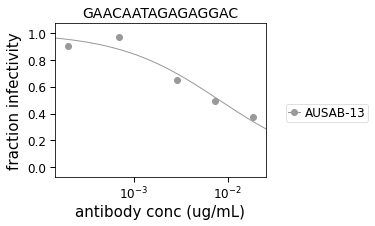

In [96]:
fig, axes = fits.plotViruses(
    xlabel='antibody conc (ug/mL)',
    sharex = False
)

In [63]:
fits.fitParams(ics=[50])

IndexError: index -2 is out of bounds for axis 0 with size 1